### Подключение модулей

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns

In [140]:
import matplotlib.pyplot as plt
%matplotlib inline

In [141]:
import warnings
warnings.filterwarnings('ignore')

Целью проекта является прогнозирование цены на ноутбуки на основе их характеристик с помощью регрессий

### Загрузка данных

In [142]:
df = pd.read_csv('laptopPrice.csv')

In [143]:
df.head(15)

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
5,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,22990,3 stars,0,0
6,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,32-bit,0 GB,Casual,No warranty,No,No,21990,3 stars,31,3
7,ASUS,Intel,Core i5,10th,8 GB,DDR4,0 GB,1024 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,58799,3 stars,0,0
8,Lenovo,Intel,Core i5,10th,4 GB,DDR4,0 GB,1024 GB,Windows,32-bit,0 GB,Casual,No warranty,No,No,49999,3 stars,0,0
9,acer,AMD,Ryzen 5,10th,4 GB,DDR4,0 GB,512 GB,Windows,32-bit,4 GB,Casual,No warranty,No,No,59990,4 stars,1946,240


##### Данные содержат следующие столбцы:

brand - Название бренда ноутбука

processor_brand - Производитель процессора

processor_name - Название модели процессора

processor_gnrtn - Поколение процессора

ram_gb - Объем оперативной памяти (ОЗУ) в гигабайтах (ГБ).

ram_type - Тип оперативной памяти

ssd - Объем SSD-накопителя в гигабайтах (ГБ).

hdd - Объем HDD-накопителя в гигабайтах (ГБ).

os - Установленная операционная система 

os_bit - Разрядность операционной системы 

graphic_card_gb - Объем памяти видеокарты в гигабайтах (ГБ).

weight - Вес ноутбука в килограммах (кг).

warranty - Срок гарантии на ноутбук

Touchscreen - Наличие сенсорного экрана 

msoffice - Наличие предустановленного Microsoft Office 

Price - Цена ноутбука в валюте (например, рубли, доллары).

rating - Средний рейтинг ноутбука (например, 4.5 из 5).

Number of Ratings - Количество оценок, оставленных пользователями.

Number of Reviews - Количество отзывов, оставленных пользователями.


In [144]:
# Смотрим основную информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [145]:
#Смотрим статистику датасета
df.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


In [146]:
# Набор данных содержит 823 строки и 19 столбцов.
# Все значения не равны нулю.
# Тип данных большинства столбцов - object.
# Цена, количество оценок и количество отзывов - целочисленный тип данных.

In [147]:
print(df.isnull().sum())

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64


Видим, что в нашем датасете нет пустых значений

<Figure size 800x600 with 0 Axes>

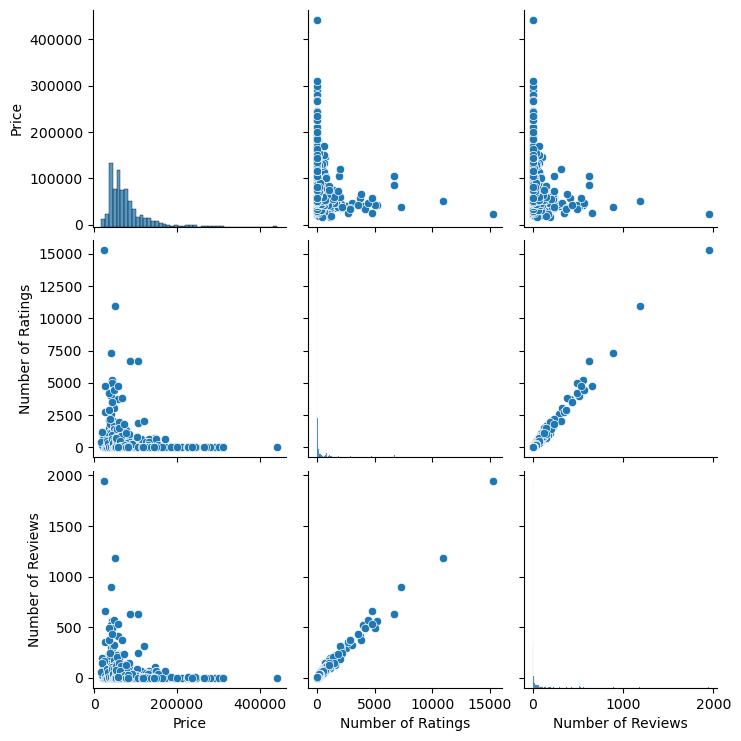

In [148]:
plt.figure(figsize=(8,6))
sns.pairplot(df)

### Видна хорошая зависимость между number of ratings и number of reviews.

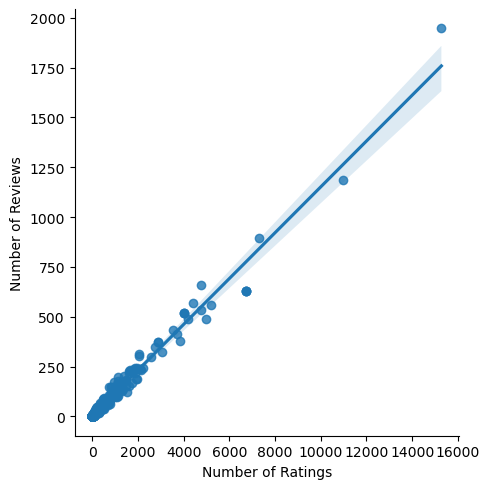

In [150]:
sns.lmplot(x='Number of Ratings',y='Number of Reviews',data=df);

In [151]:
columns = ['Price', 'Number of Ratings', 'Number of Reviews']

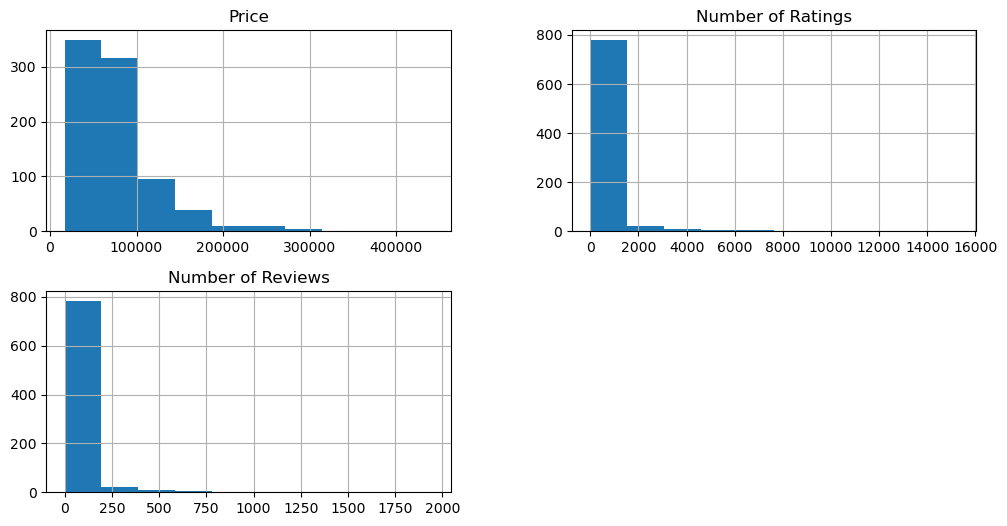

In [152]:
df[columns].hist(figsize=(12, 6));

Существует сильная зависимость между количеством оценок и количеством отзывов.

И существует слабая зависимость между ценой и количеством оценок и обзоров.

Т.е дорогие ноутбуки получают очень мало отзывов (и оценок) или вообще не получают их.

<Axes: xlabel='Price', ylabel='Density'>

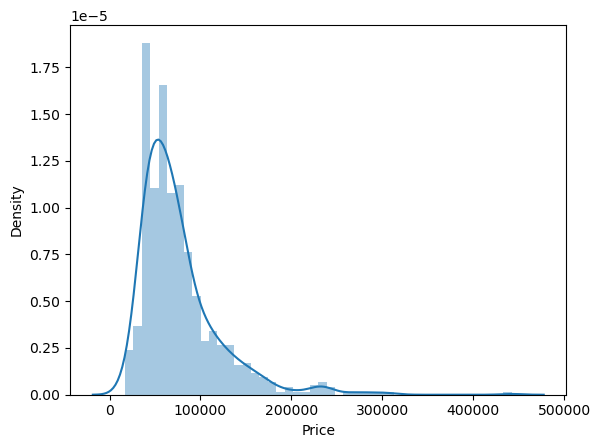

In [153]:
sns.distplot(df['Price'])

Здесь мы можем увидеть, что средняя стоимость находится около 70к.

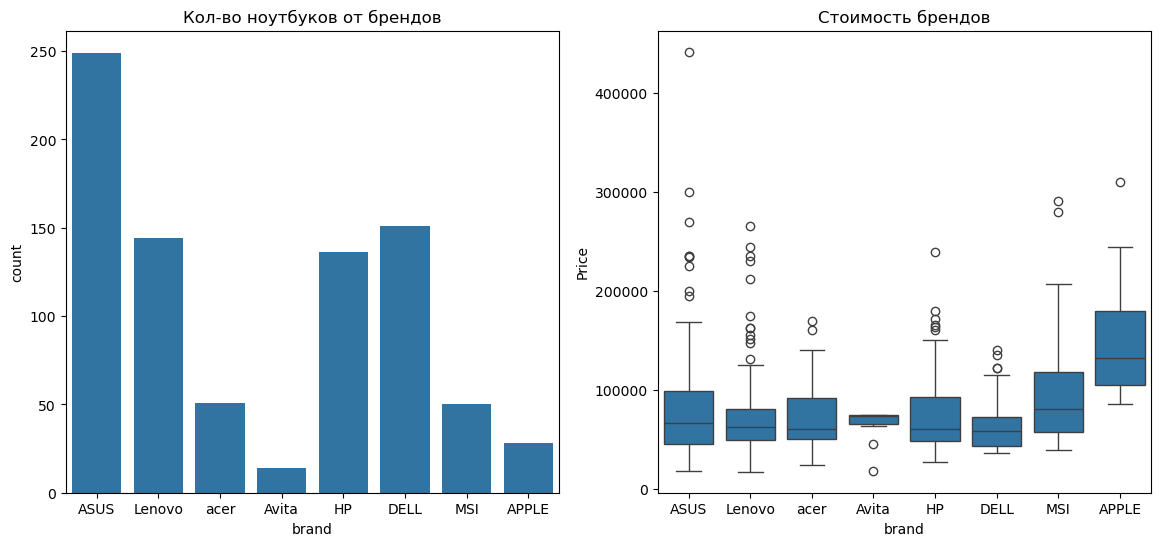

In [154]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=df.brand)
axes[0].set_title("Кол-во ноутбуков от брендов")

sns.boxplot(ax=axes[1], x=df.brand, y=df.Price)
axes[1].set_title("Стоимость брендов");

In [155]:
df['processor_brand'].unique()

array(['Intel', 'AMD', 'M1'], dtype=object)

In [156]:
df['ram_gb'].unique()

array(['4 GB', '8 GB', '16 GB', '32 GB'], dtype=object)

In [157]:
df['processor_name'].unique()

array(['Core i3', 'Core i5', 'Celeron Dual', 'Ryzen 5', 'Core i7',
       'Core i9', 'M1', 'Pentium Quad', 'Ryzen 3', 'Ryzen 7', 'Ryzen 9'],
      dtype=object)

In [158]:
df['processor_gnrtn'].unique()

array(['10th', 'Not Available', '11th', '7th', '8th', '9th', '4th',
       '12th'], dtype=object)

In [159]:
# возвращаем кол-во строк с каждым уникальным значением в столбце processor_brand для тех строк, где в столбце processor_gnrtn указано "Not Available"
df[df['processor_gnrtn'] == "Not Available"]['processor_brand'].value_counts()

processor_brand
AMD      185
Intel     40
Name: count, dtype: int64

In [160]:
df['processor_brand'].value_counts()

processor_brand
Intel    610
AMD      189
M1        24
Name: count, dtype: int64

In [161]:
not_available_counts = df[df['processor_gnrtn'] == "Not Available"]['processor_brand'].value_counts()

In [162]:
total_counts = df['processor_brand'].value_counts()

In [163]:
percentage_not_available = (not_available_counts / total_counts).fillna(0) * 100

In [164]:
print(percentage_not_available)

processor_brand
AMD      97.883598
Intel     6.557377
M1        0.000000
Name: count, dtype: float64


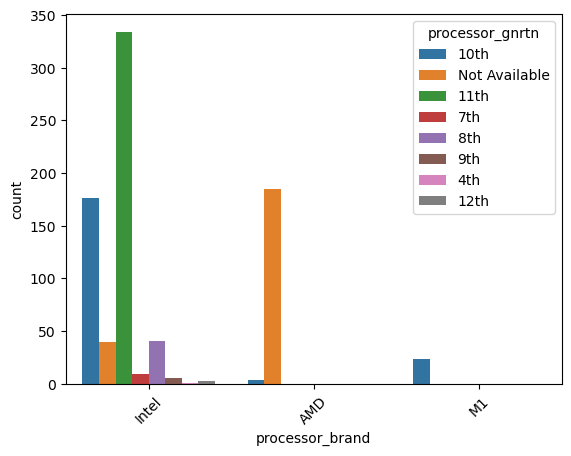

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='processor_brand', hue='processor_gnrtn')
plt.xticks(rotation=45)
plt.show()

In [166]:
df = df.drop(columns=['processor_gnrtn'])

In [167]:
df.head(10)

,brand,processor_brand,processor_name,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
5,ASUS,Intel,Celeron Dual,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,22990,3 stars,0,0
6,ASUS,Intel,Celeron Dual,4 GB,DDR4,0 GB,512 GB,Windows,32-bit,0 GB,Casual,No warranty,No,No,21990,3 stars,31,3
7,ASUS,Intel,Core i5,8 GB,DDR4,0 GB,1024 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,58799,3 stars,0,0
8,Lenovo,Intel,Core i5,4 GB,DDR4,0 GB,1024 GB,Windows,32-bit,0 GB,Casual,No warranty,No,No,49999,3 stars,0,0
9,acer,AMD,Ryzen 5,4 GB,DDR4,0 GB,512 GB,Windows,32-bit,4 GB,Casual,No warranty,No,No,59990,4 stars,1946,240


In [168]:
df.columns

Index(['brand', 'processor_brand', 'processor_name', 'ram_gb', 'ram_type',
       'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb', 'weight', 'warranty',
       'Touchscreen', 'msoffice', 'Price', 'rating', 'Number of Ratings',
       'Number of Reviews'],
      dtype='object')

##### Переведем бренды ноутбуков в тип данных int, используя для этого метод map

In [169]:
df["brand"] = df["brand"].map({
    "ASUS":1,
    "DELL":2,
    "Lenovo":3,
    "HP":4,
    "acer":5,
    "MSI":6,
    "APPLE":7,
    "Avita":8
})
df

,brand,processor_brand,processor_name,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,1,Intel,Core i3,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,3,Intel,Core i3,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,3,Intel,Core i3,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,1,Intel,Core i5,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,1,Intel,Celeron Dual,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,1,AMD,Ryzen 9,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,1,AMD,Ryzen 9,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,1,AMD,Ryzen 9,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,1,AMD,Ryzen 9,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


In [170]:
df["processor_brand"] = df["processor_brand"].map({
    "Intel":1,
    "AMD":2,
    "M1":3
})
df

,brand,processor_brand,processor_name,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,1,1,Core i3,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,3,1,Core i3,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,3,1,Core i3,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,1,1,Core i5,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,1,1,Celeron Dual,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,1,2,Ryzen 9,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,1,2,Ryzen 9,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,1,2,Ryzen 9,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,1,2,Ryzen 9,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


In [171]:
df["ram_gb"] = df["ram_gb"].str.replace(" GB", "").astype(int)

In [172]:
df.head()

,brand,processor_brand,processor_name,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,1,1,Core i3,4,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,3,1,Core i3,4,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,3,1,Core i3,4,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,1,1,Core i5,8,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,1,1,Celeron Dual,4,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [173]:
df["processor_name"] = df["processor_name"].map({
    "Core i5":1,"Core i3":2  ,"Core i7":3 ,
    "Ryzen 5":4,"Ryzen 7":5,"Ryzen 3":6,
    "Ryzen 9":7,"Celeron Dual":8,"M1":9,
    "Pentium Quad":10,"Core i9":11})


In [174]:
df["ram_type"].value_counts()

ram_type
DDR4       709
LPDDR4X     58
LPDDR4      27
LPDDR3      14
DDR5         8
DDR3         7
Name: count, dtype: int64

In [175]:
df["ram_type"] = df["ram_type"].map({
    "DDR4": 1,
    "LPDDR4X": 2,
    "LPDDR4": 3,
    "LPDDR3": 4,
    "DDR5": 5,
    "DDR3": 6
})

In [176]:
df["ssd"] = df["ssd"].str.replace(" GB", "").astype(int)

In [177]:
df["hdd"] = df["hdd"].str.replace(" GB", "").astype(int)

In [178]:
df["graphic_card_gb"] = df["graphic_card_gb"].str.replace(" GB", "").astype(int)


In [179]:
df["Touchscreen"] = df["Touchscreen"].map({"No":0,"Yes":1})

In [180]:
df["rating"] = df["rating"].str.replace(" stars", "", regex=False)
df["rating"] = df["rating"].str.replace(" star", "", regex=False)
df["rating"] = df["rating"].str.strip()
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df["rating"] = df["rating"].fillna(0).astype(int)

#### Посмотрим корреляционную матрицу для нашего набора данных

In [181]:
df[['brand', "processor_name", 'processor_brand',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'graphic_card_gb', 'Touchscreen', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews']].corr()

,brand,processor_name,processor_brand,ram_gb,ram_type,ssd,hdd,graphic_card_gb,Touchscreen,Price,rating,Number of Ratings,Number of Reviews
brand,1.000000,0.073083,0.190863,0.145681,-0.042845,-0.011057,-0.090194,0.033632,-0.075946,0.167507,0.089997,0.065733,0.049435
processor_name,0.073083,1.000000,0.628763,-0.005328,0.002660,0.176387,-0.090639,0.078568,-0.040212,0.230249,-0.024348,0.126394,0.127684
processor_brand,0.190863,0.628763,1.000000,-0.063537,-0.095796,0.194273,-0.147134,0.018454,-0.043566,0.178755,0.115554,0.101555,0.082937
ram_gb,0.145681,-0.005328,-0.063537,1.000000,0.058464,0.390703,-0.176682,0.278544,0.056914,0.518323,0.018126,-0.113348,-0.116811
ram_type,-0.042845,0.002660,-0.095796,0.058464,1.000000,0.052013,-0.054191,0.046723,0.060501,0.260674,-0.083229,0.006140,0.007814
ssd,-0.011057,0.176387,0.194273,0.390703,0.052013,1.000000,-0.589509,0.334424,0.171277,0.628272,0.037787,-0.164338,-0.169160
hdd,-0.090194,-0.090639,-0.147134,-0.176682,-0.054191,-0.589509,1.000000,-0.058491,-0.191694,-0.252699,-0.070010,0.103361,0.113588
graphic_card_gb,0.033632,0.078568,0.018454,0.278544,0.046723,0.334424,-0.058491,1.000000,-0.103253,0.459986,0.040920,-0.027118,-0.021457
Touchscreen,-0.075946,-0.040212,-0.043566,0.056914,0.060501,0.171277,-0.191694,-0.103253,1.000000,0.189126,-0.003788,-0.100870,-0.101605
Price,0.167507,0.230249,0.178755,0.518323,0.260674,0.628272,-0.252699,0.459986,0.189126,1.000000,-0.033528,-0.140392,-0.148738


<Axes: >

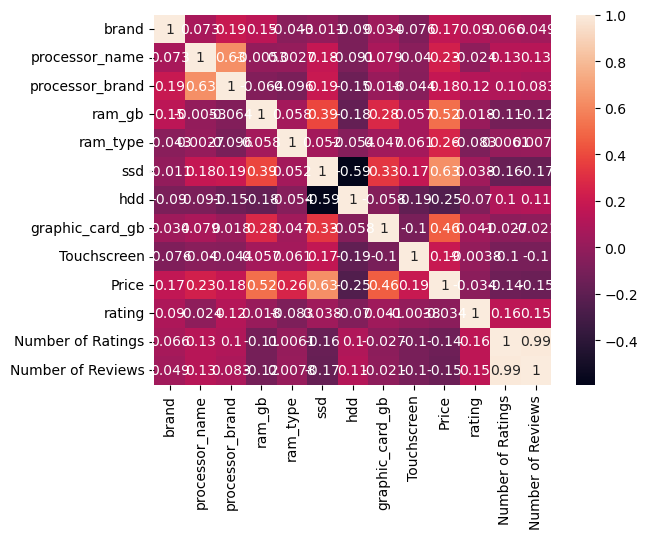

In [ ]:
sns.heatmap(df[['brand', "processor_name", 'processor_brand',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'graphic_card_gb', 'Touchscreen', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews']].corr(),annot=True)


##### Видим сильную корреляцию между price и ram_gb (объем оперативной памяти), price и ram_type (тип оперативной памяти), price и graphic_card_gb (объем памяти видеокарты), price и ssd

<Axes: xlabel='ram_gb', ylabel='Price'>

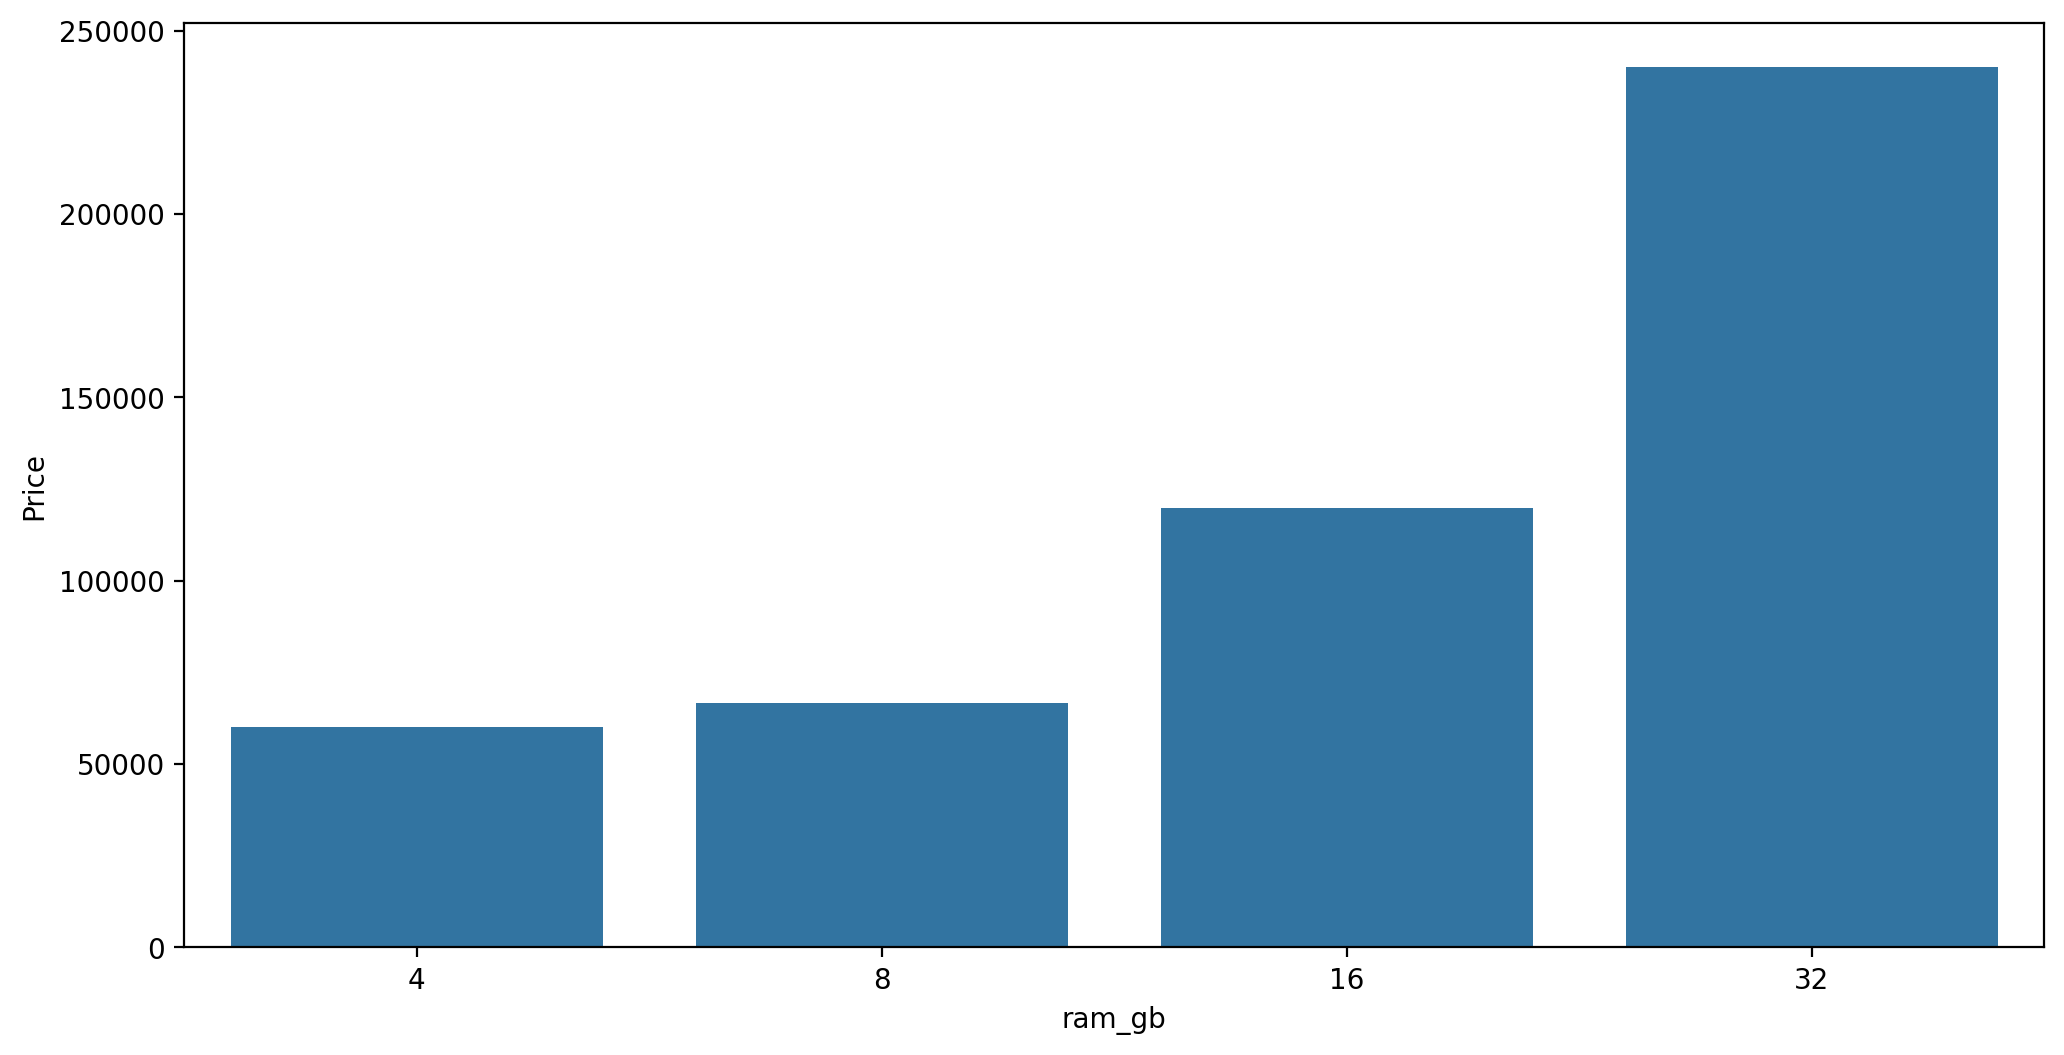

In [183]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'ram_gb', y = 'Price', data = df, ci = None)

<Axes: xlabel='ram_type', ylabel='Price'>

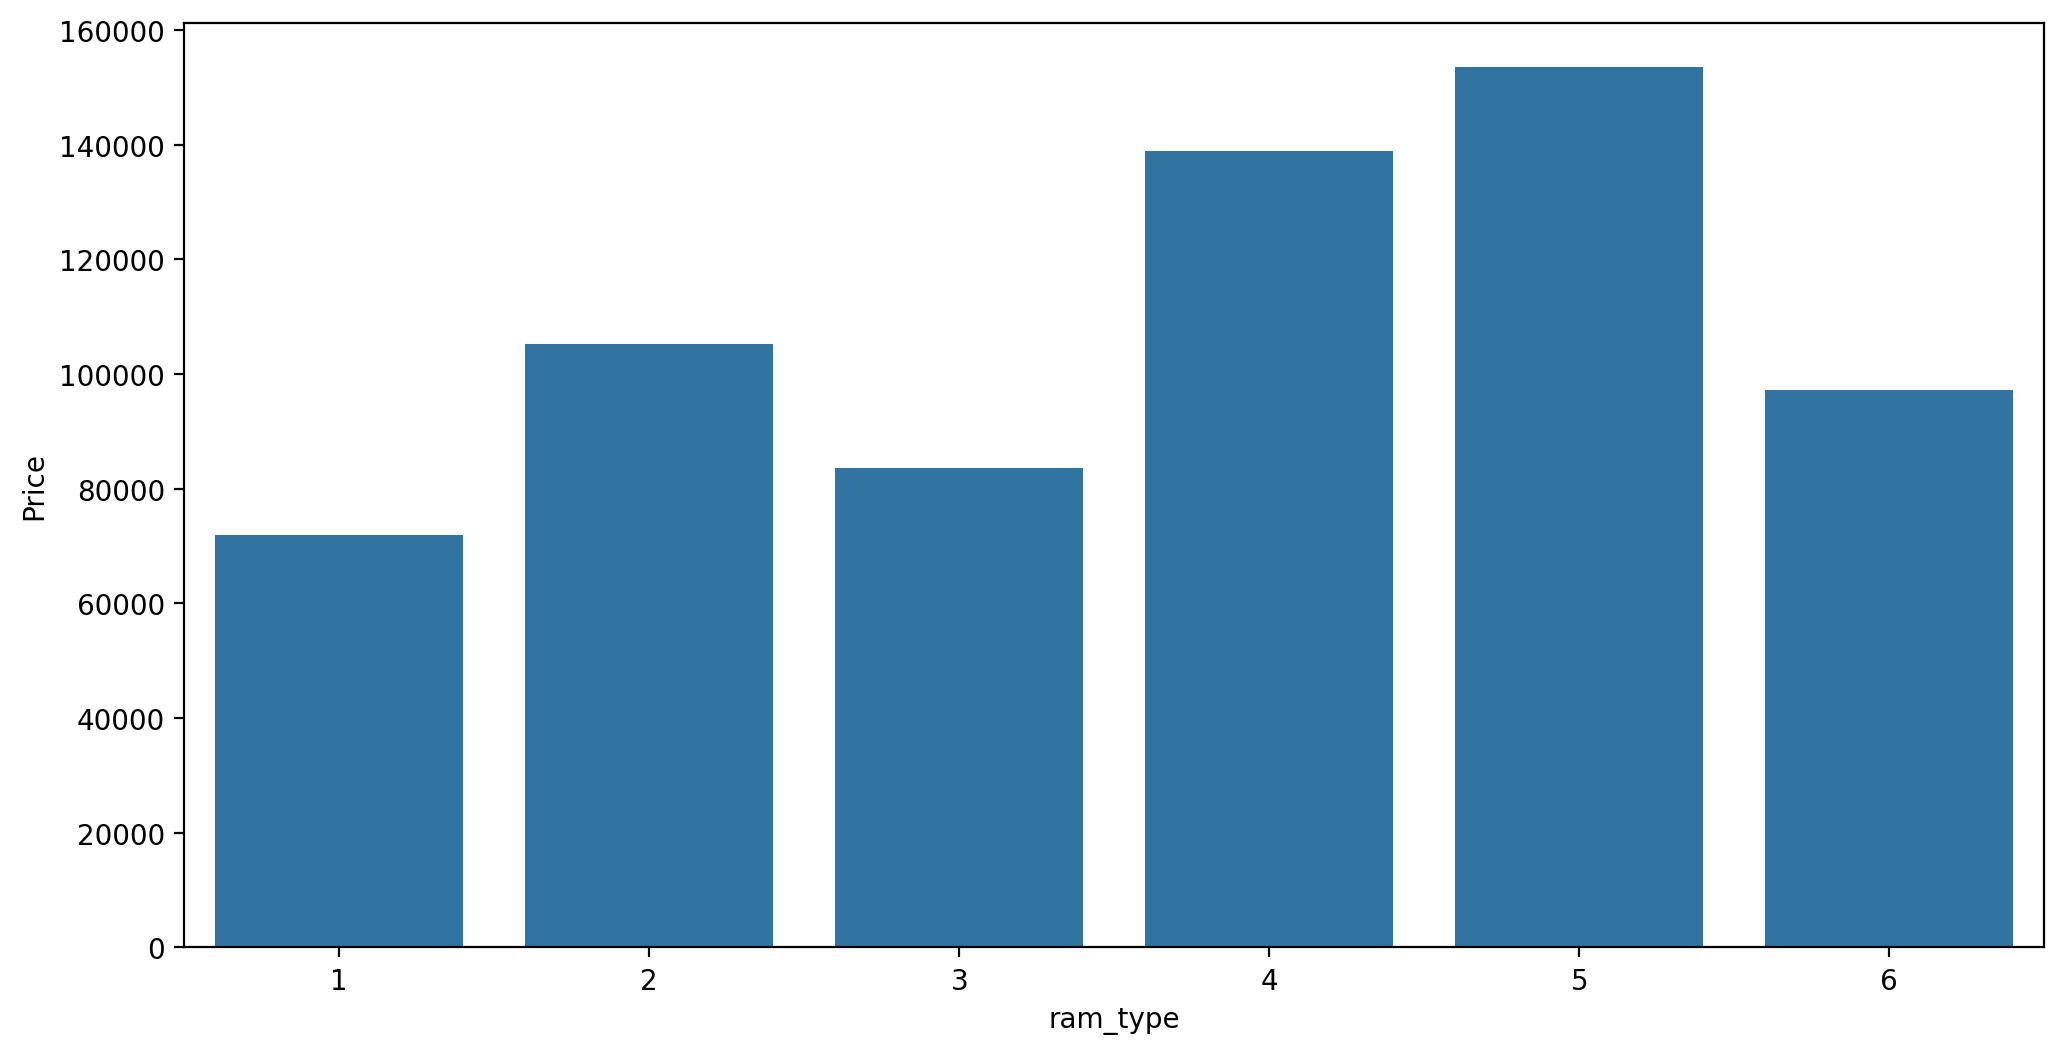

In [184]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'ram_type', y = 'Price', data = df, ci = None)

    "DDR4": 1,
    "LPDDR4X": 2,
    "LPDDR4": 3,
    "LPDDR3": 4,
    "DDR5": 5,
    "DDR3": 6

<Axes: xlabel='graphic_card_gb', ylabel='Price'>

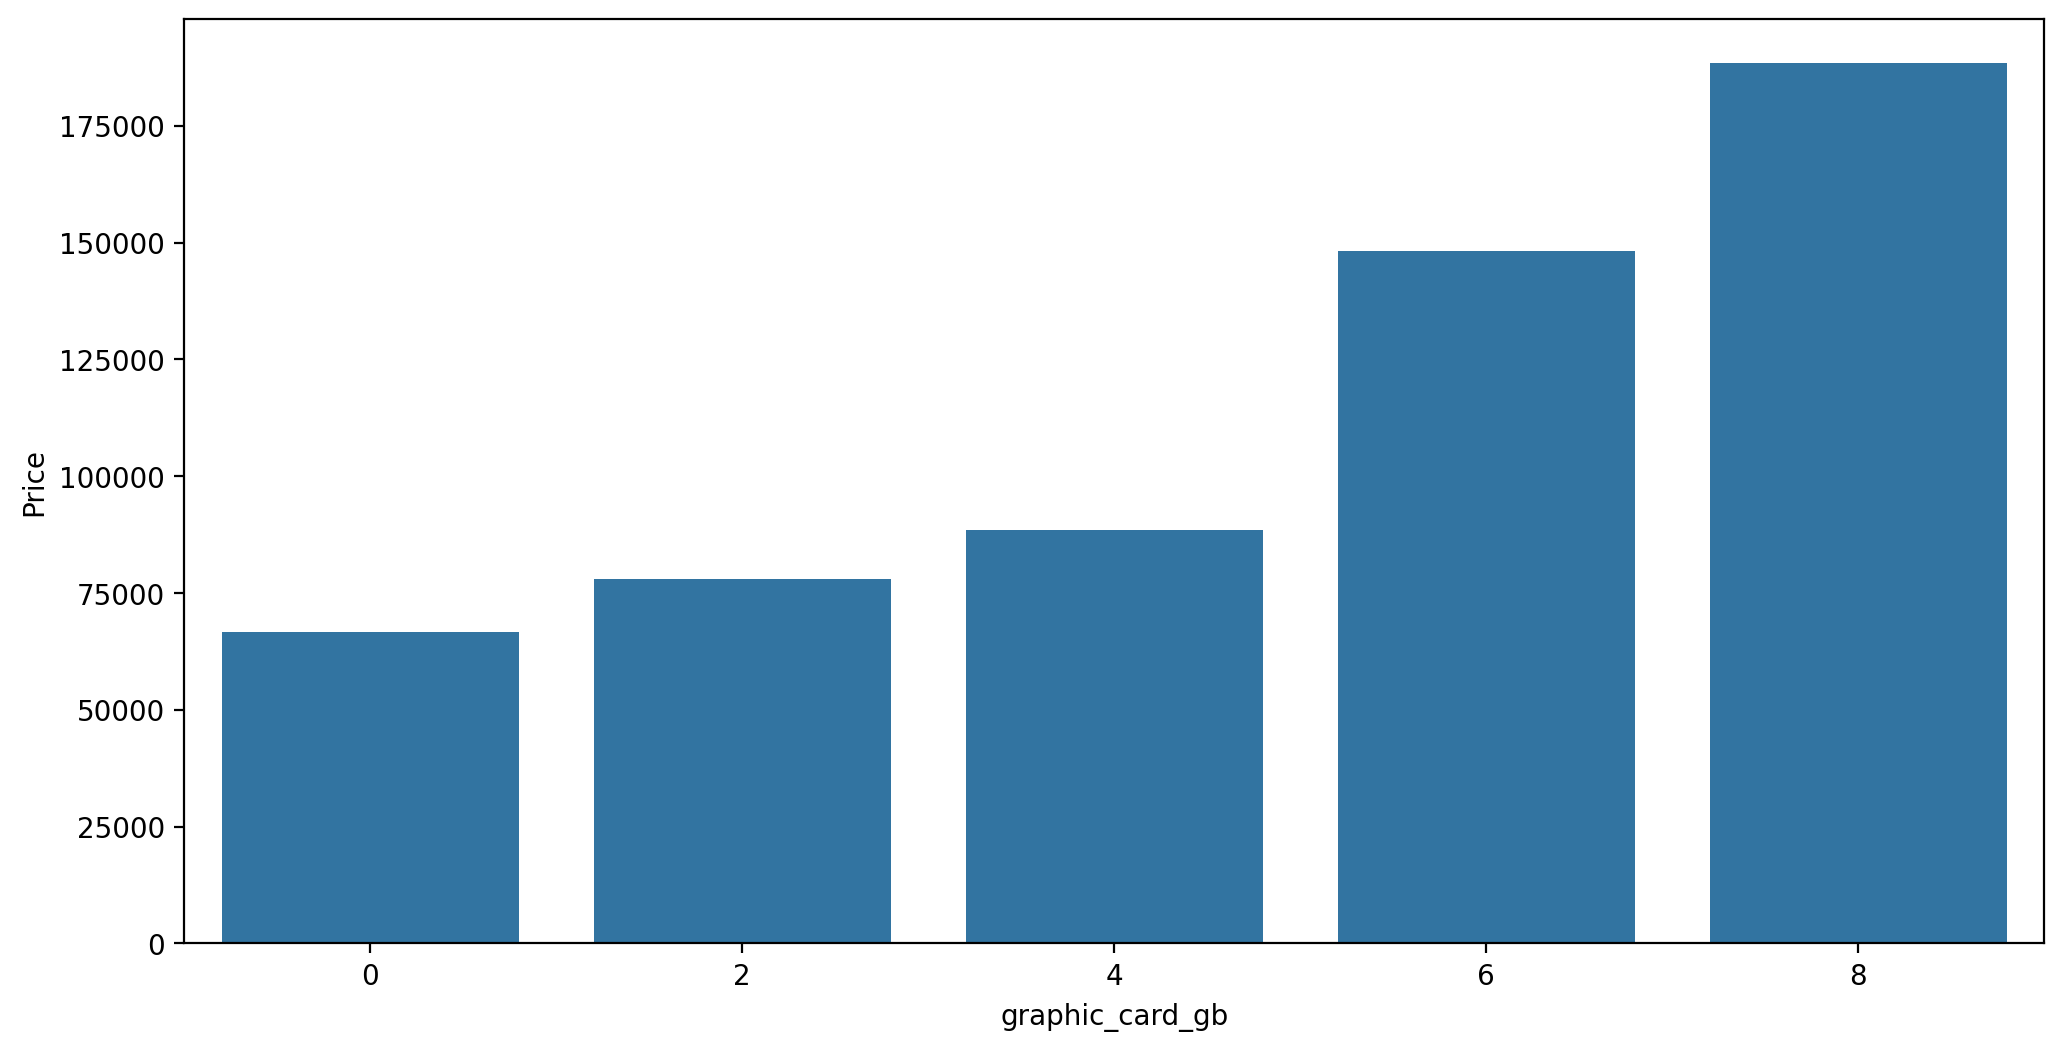

In [185]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'graphic_card_gb', y = 'Price', data = df, ci = None)

<Axes: xlabel='ssd', ylabel='Price'>

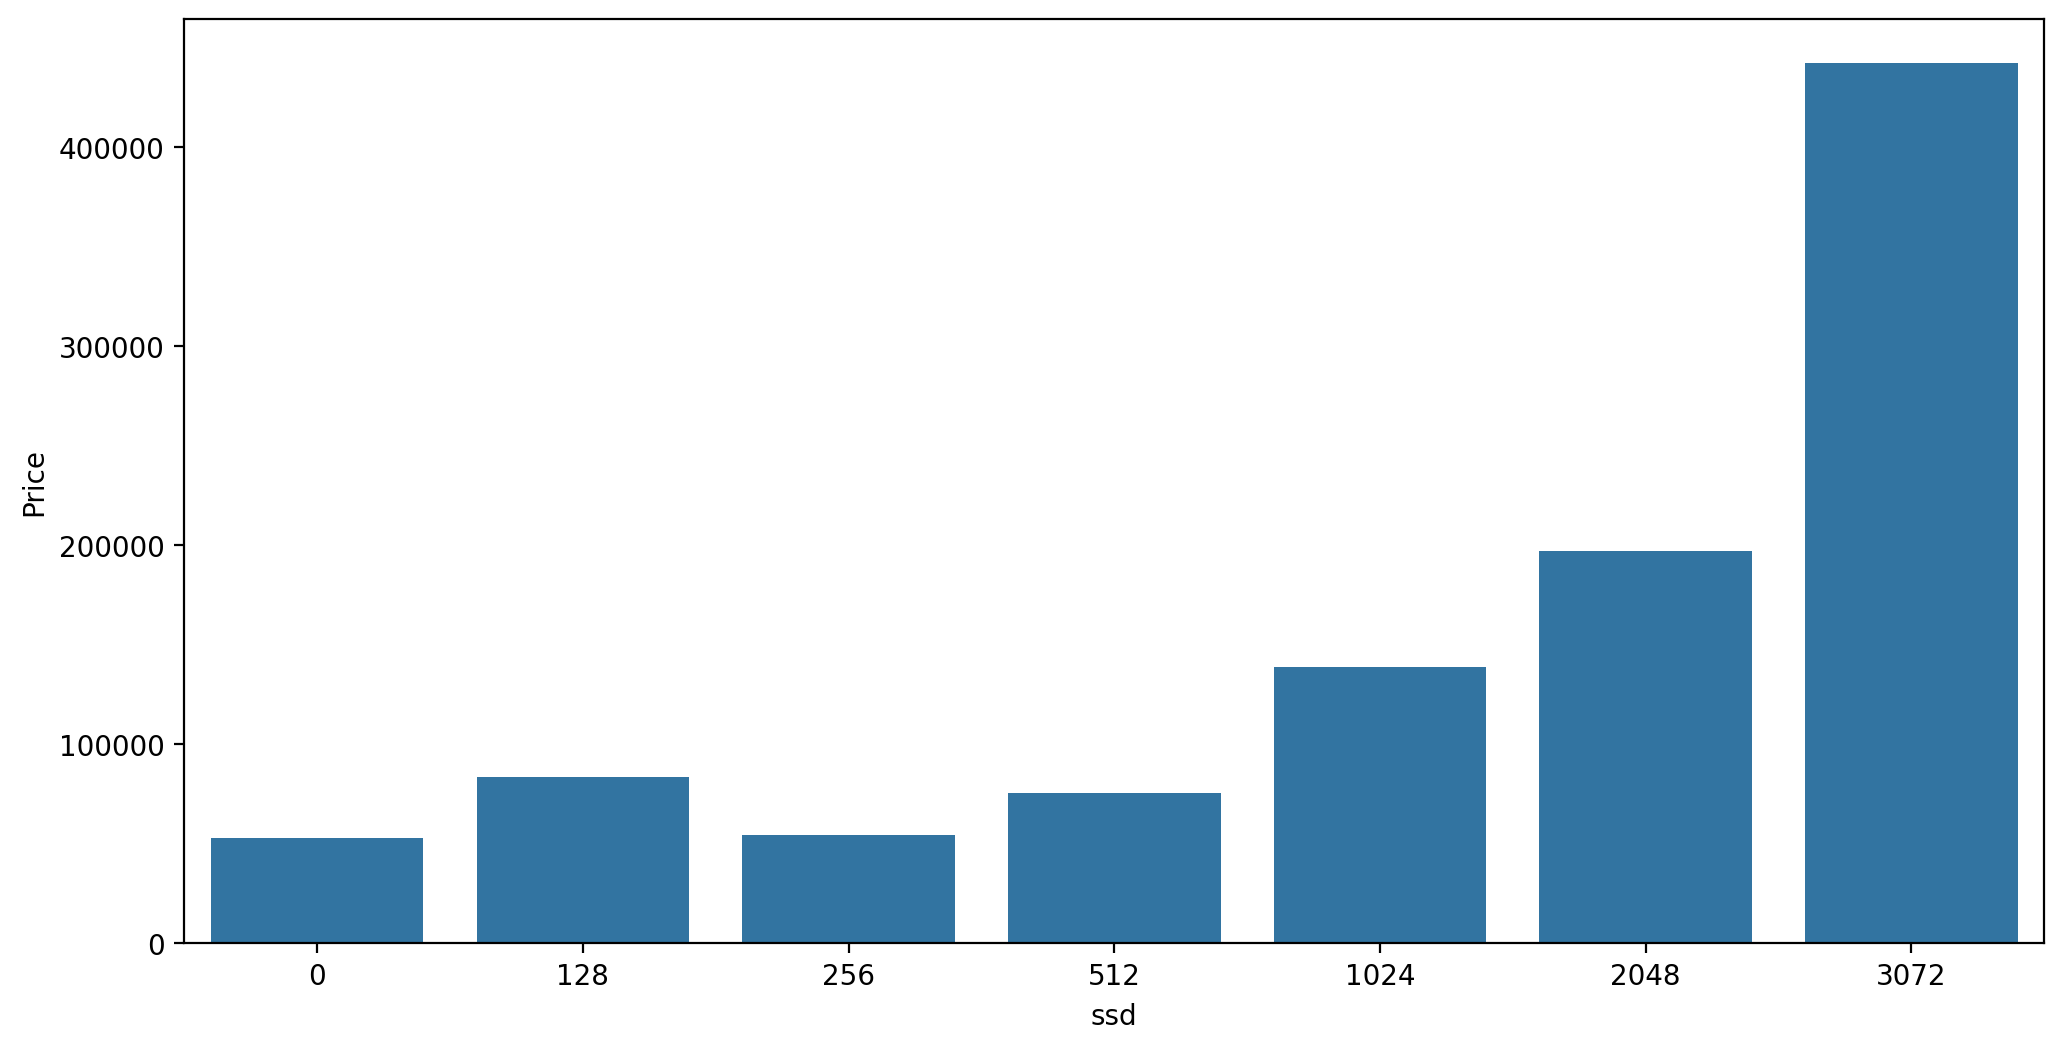

In [186]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'ssd', y = 'Price', data = df, ci = None)

#### Путем просмотра данных графиков следует сделать вывод, что чем больше мы имеем какой-либо памяти, тем дороже будет стоить устройство

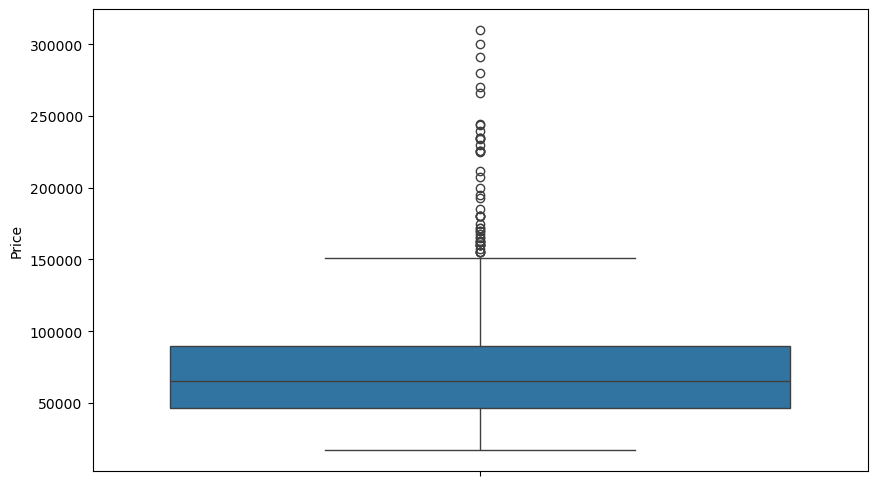

In [304]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df["Price"])
plt.xticks(rotation=45)
plt.show()

#### Посмотрим выбросы по цене устройства, так как можно заметить слишком дорогой ноутбук в данном графике

In [188]:
high_price_rows = df[df['Price'] > 350000]
print(high_price_rows)

     brand  processor_brand  processor_name  ram_gb  ram_type   ssd  hdd  \
594      1                1              11      16         1  3072    0   

          os  os_bit  graphic_card_gb  weight warranty  Touchscreen msoffice  \
594  Windows  32-bit                6  Casual   1 year            0       No   

      Price  rating  Number of Ratings  Number of Reviews  
594  441990       5                  1                  1  


In [189]:
df = df.drop(index=594)
print(df.shape)

(822, 18)


In [190]:
df.describe()

,brand,processor_brand,processor_name,ram_gb,ram_type,ssd,hdd,graphic_card_gb,Touchscreen,Price,rating,Number of Ratings,Number of Reviews
count,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000
mean,2.906326,1.288321,3.052311,8.671533,1.268856,448.934307,227.347932,1.184915,0.118005,76300.840633,3.560827,315.683698,37.654501
std,1.821441,0.513719,2.424688,4.367597,0.807684,303.359385,413.280725,2.021171,0.322810,43289.284228,0.565404,1047.962854,121.795419
min,1.000000,1.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,16990.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,4.000000,1.000000,256.000000,0.000000,0.000000,0.000000,46042.500000,3.000000,0.000000,0.000000
50%,3.000000,1.000000,2.000000,8.000000,1.000000,512.000000,0.000000,0.000000,0.000000,64990.000000,4.000000,17.000000,2.000000
75%,4.000000,2.000000,4.000000,8.000000,1.000000,512.000000,0.000000,2.000000,0.000000,89525.000000,4.000000,140.250000,18.000000
max,8.000000,3.000000,11.000000,32.000000,6.000000,2048.000000,2048.000000,8.000000,1.000000,309990.000000,5.000000,15279.000000,1947.000000


#### Можно заметить, что люди в среднем берут себе устройство до 60-70 тысяч (валюты)

# Обучение модели

In [191]:
df.columns

Index(['brand', 'processor_brand', 'processor_name', 'ram_gb', 'ram_type',
       'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb', 'weight', 'warranty',
       'Touchscreen', 'msoffice', 'Price', 'rating', 'Number of Ratings',
       'Number of Reviews'],
      dtype='object')

In [192]:
X = df[['ram_gb', 'ram_type', 'graphic_card_gb',
       'Touchscreen', 'ssd','processor_name', 'brand', 'hdd', 'rating', 'Number of Reviews']]

In [193]:
y = df['Price']

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Будут рассмотрены следующие модели:** линейная регрессия, ближайшие соседи и дерево принятия решений.

### Линейная регрессия

In [196]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

In [197]:
predictions = lrm.predict(X_test)

In [198]:
y_test.round(3)

611    131990
174     41890
67      41998
168     40390
275     57500
        ...  
806    134990
771     73400
627     33990
145     41990
578    116941
Name: Price, Length: 247, dtype: int64

<Axes: xlabel='Price'>

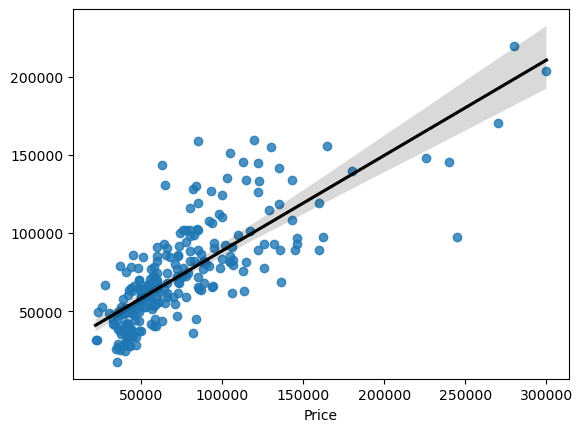

In [199]:
sns.regplot(x=y_test,y=predictions,line_kws={"color":"black"})

<Axes: xlabel='Price', ylabel='Density'>

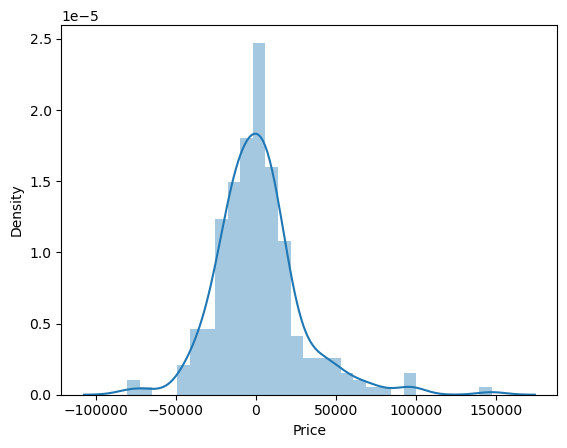

In [200]:
sns.distplot((y_test - predictions))

### В линейнной регрессии видно сильные выбросы от точных значений

### Метрики оценки качества линейной регрессии

In [201]:
metrics.mean_absolute_error(y_test, predictions)

18808.21242924997

In [202]:
metrics.mean_squared_error(y_test, predictions)

737631478.6955717

In [203]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

27159.371839119765

In [207]:
print(f'Test R2 {r2_score(y_test, predictions):.2f}')

Test R2 0.60


#### Хоть и выбросы сильные, r2_score всеравно показал не самый ужасный результат

### KNeighborsRegressor

In [209]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

In [210]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [219]:
from sklearn.metrics import r2_score

pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.73
Test R2 0.54


### Метрики оценки качества KNeighborsRegressor

<Axes: xlabel='Price', ylabel='Density'>

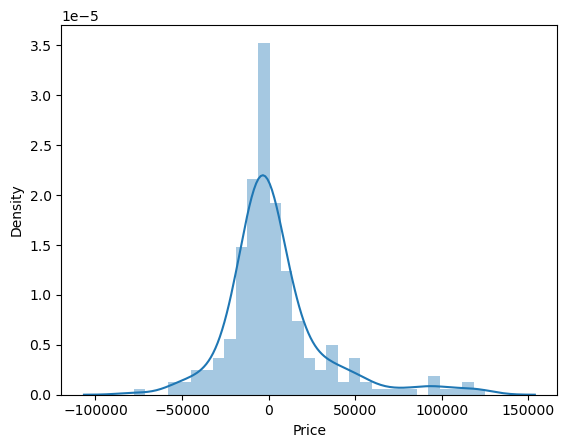

In [229]:
sns.distplot((y_test - pred_test))

<Axes: xlabel='Price'>

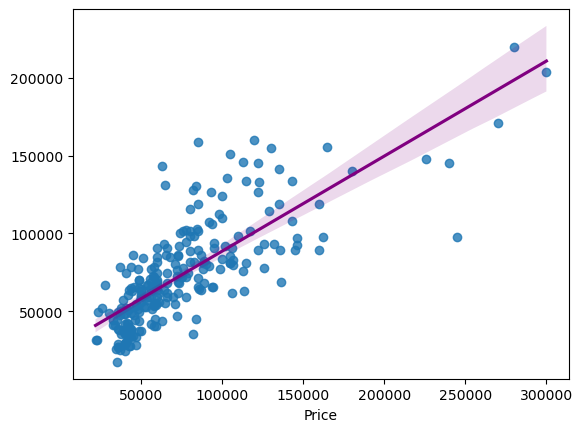

In [230]:

sns.regplot(x=y_test,y=predictions,line_kws={"color":"purple"})

In [231]:
predictions = knn.predict(X_test)

In [233]:
metrics.mean_absolute_error(y_test, predictions)

18214.50931174089

In [234]:
metrics.mean_squared_error(y_test, predictions)

849401120.3891498

In [235]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

29144.48696390365

### Между линейной регрессией и регрессией соседей разница не сильно большая, но линейная регрессия себя показала не сильно, но лучше

### DecisionTreeRegressor

In [237]:
from sklearn.tree import DecisionTreeRegressor

tree_1 = DecisionTreeRegressor(random_state=1, max_depth=9)
tree_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, random_state=1)

In [238]:
pred_train = tree_1.predict(X_train)
pred_test = tree_1.predict(X_test)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.94
Test R2 0.37


### Метрики оценки качества DecisionTreeRegressor

In [239]:
metrics.mean_absolute_error(y_test, pred_test)

16690.280867752328

In [240]:
metrics.mean_squared_error(y_test, pred_test)

1166509569.1095998

In [241]:
np.sqrt(metrics.mean_squared_error(y_test, pred_test))

34154.202803016786

<Axes: xlabel='Price', ylabel='Density'>

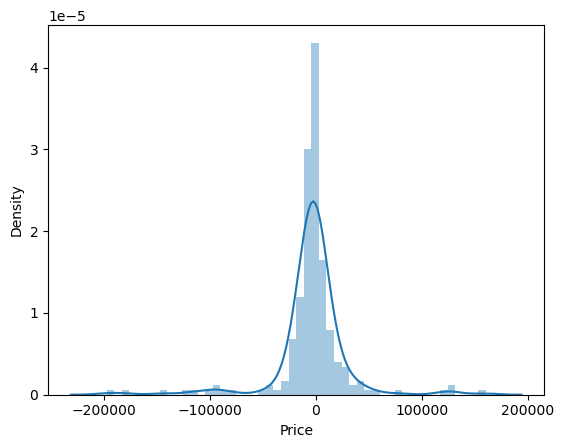

In [ ]:
sns.distplot((y_test - pred_test))


<Axes: xlabel='Price'>

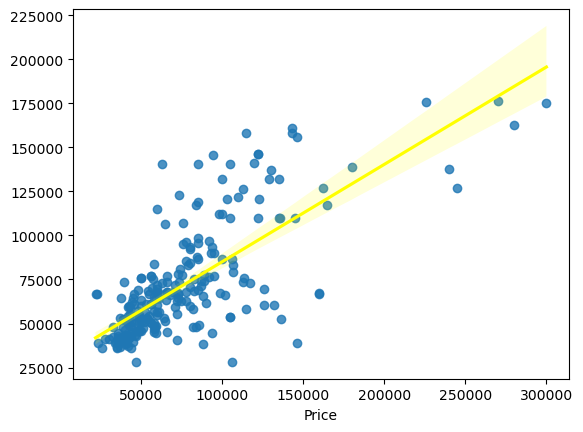

In [246]:
sns.regplot(x=y_test,y=predictions,line_kws={"color":"yellow"})

### Нормализация

In [249]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)

MinMaxScaler()

In [250]:
X_train_norm = pd.DataFrame(mms.transform(X_train), columns=X_train.columns)
X_train_norm

,ram_gb,ram_type,graphic_card_gb,Touchscreen,ssd,processor_name,brand,hdd,rating,Number of Reviews
0,0.142857,0.0,0.5,0.0,0.250,0.0,0.714286,0.00,0.75,0.117103
1,0.428571,0.0,0.0,0.0,0.250,0.0,0.285714,0.00,0.75,0.048793
2,0.428571,0.0,0.0,0.0,0.125,0.0,0.000000,0.50,0.75,0.000514
3,0.142857,0.0,0.0,0.0,0.250,0.0,0.000000,0.00,0.50,0.000000
4,0.142857,0.0,0.0,0.0,0.000,0.1,0.142857,0.50,0.75,0.020544
...,...,...,...,...,...,...,...,...,...,...
570,0.000000,0.0,0.0,0.0,0.125,0.1,0.285714,0.00,0.75,0.000514
571,0.142857,0.0,0.0,0.0,0.250,0.1,0.428571,0.00,0.50,0.000000
572,0.142857,0.0,0.0,1.0,0.250,0.0,0.285714,0.00,0.75,0.006163
573,0.142857,0.4,1.0,0.0,0.000,0.0,0.714286,0.25,0.75,0.002568


In [251]:
X_train_norm.describe()

,ram_gb,ram_type,graphic_card_gb,Touchscreen,ssd,processor_name,brand,hdd,rating,Number of Reviews
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000
mean,0.170186,0.052870,0.156522,0.113043,0.223804,0.204696,0.271056,0.111304,0.638696,0.016858
std,0.160768,0.160968,0.261622,0.316922,0.148122,0.239182,0.259427,0.202882,0.143084,0.056875
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.500000,0.000000
50%,0.142857,0.000000,0.000000,0.000000,0.250000,0.100000,0.285714,0.000000,0.750000,0.001027
75%,0.142857,0.000000,0.250000,0.000000,0.250000,0.300000,0.428571,0.000000,0.750000,0.009245
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [252]:
X_test_norm = pd.DataFrame(mms.transform(X_test), columns=X_train.columns)
X_test_norm.describe()

,ram_gb,ram_type,graphic_card_gb,Touchscreen,ssd,processor_name,brand,hdd,rating,Number of Reviews
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,0.159051,0.055870,0.128543,0.129555,0.208502,0.206478,0.275304,0.110324,0.643725,0.025117
std,0.144252,0.163162,0.229716,0.336495,0.147876,0.250444,0.262515,0.199656,0.137453,0.073920
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.500000,0.000000
50%,0.142857,0.000000,0.000000,0.000000,0.250000,0.100000,0.285714,0.000000,0.750000,0.001027
75%,0.142857,0.000000,0.250000,0.000000,0.250000,0.300000,0.428571,0.000000,0.750000,0.008988
max,0.428571,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,0.500000,1.000000,0.608629


#### Обучение модели на масштабированных данных

In [253]:
from sklearn.metrics import r2_score

In [254]:
knn.fit(X_train_norm, y_train)

KNeighborsRegressor()

In [255]:
pred_train = knn.predict(X_train_norm)
pred_test = knn.predict(X_test_norm)

print(metrics.mean_absolute_error(y_test, pred_test))
print (metrics.mean_squared_error(y_test, pred_test))
print(np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

14924.819433198381
772621447.4205668
27796.068920273003
Train R2 0.79
Test R2 0.59


### Здесь уже на числах можно увидеть небольшие улучшения счета r2 как и в Train так и в Test

# Настройка гиперпараметров

In [258]:
tree_1 = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=1
)
tree_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=20,
                      random_state=1)

In [259]:
pred_train = tree_1.predict(X_train_norm)
pred_test = tree_1.predict(X_test_norm)

print(metrics.mean_absolute_error(y_test, pred_test))
print(metrics.mean_squared_error(y_test, pred_test))
print(np.sqrt(metrics.mean_squared_error(y_test, pred_test)))
print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

27265.515871125783
1756533807.1772745
41911.022502168504
Train R2 -0.03
Test R2 0.06


In [260]:
lrm.fit(X_train_norm, y_train)

LinearRegression()

In [261]:
pred_train = lrm.predict(X_train_norm)
pred_test = lrm.predict(X_test_norm)

print(metrics.mean_absolute_error(y_test, pred_test))
print(metrics.mean_squared_error(y_test, pred_test))
print(np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

18808.21242924981
737631478.6955639
27159.37183911962
Train R2 0.64
Test R2 0.60


### В случае линейной регрессии настроенные гиперпараметры к сожалению не улучшили ситуацию

### Стандартизация

In [287]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [288]:
X_train_std = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_train_std

,ram_gb,ram_type,graphic_card_gb,Touchscreen,ssd,processor_name,brand,hdd,rating,Number of Reviews
0,-0.1701,-0.3287,1.3140,-0.3570,0.1770,-0.8566,1.7100,-0.5491,0.7786,1.7641
1,1.6086,-0.3287,-0.5988,-0.3570,0.1770,-0.8566,0.0566,-0.5491,0.7786,0.5620
2,1.6086,-0.3287,-0.5988,-0.3570,-0.6676,-0.8566,-1.0457,1.9175,0.7786,-0.2876
3,-0.1701,-0.3287,-0.5988,-0.3570,0.1770,-0.8566,-1.0457,-0.5491,-0.9702,-0.2967
4,-0.1701,-0.3287,-0.5988,-0.3570,-1.5123,-0.4381,-0.4946,1.9175,0.7786,0.0649
...,...,...,...,...,...,...,...,...,...,...
570,-1.0595,-0.3287,-0.5988,-0.3570,-0.6676,-0.4381,0.0566,-0.5491,0.7786,-0.2876
571,-0.1701,-0.3287,-0.5988,-0.3570,0.1770,-0.4381,0.6077,-0.5491,-0.9702,-0.2967
572,-0.1701,-0.3287,-0.5988,2.8011,0.1770,-0.8566,0.0566,-0.5491,0.7786,-0.1882
573,-0.1701,2.1584,3.2268,-0.3570,-1.5123,-0.8566,1.7100,0.6842,0.7786,-0.2515


In [289]:
X_train_std.describe()

,ram_gb,ram_type,graphic_card_gb,Touchscreen,ssd,processor_name,brand,hdd,rating,Number of Reviews
count,575.0000,575.0000,575.0000,575.0000,575.0000,575.0000,575.0000,575.0000,575.0000,575.0000
mean,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000
std,1.0009,1.0009,1.0009,1.0009,1.0009,1.0009,1.0009,1.0009,1.0009,1.0009
min,-1.0595,-0.3287,-0.5988,-0.3570,-1.5123,-0.8566,-1.0457,-0.5491,-4.4677,-0.2967
25%,-1.0595,-0.3287,-0.5988,-0.3570,-0.6676,-0.8566,-1.0457,-0.5491,-0.9702,-0.2967
50%,-0.1701,-0.3287,-0.5988,-0.3570,0.1770,-0.4381,0.0566,-0.5491,0.7786,-0.2786
75%,-0.1701,-0.3287,0.3576,-0.3570,0.1770,0.3988,0.6077,-0.5491,0.7786,-0.1340
max,5.1660,5.8891,3.2268,2.8011,5.2448,3.3280,2.8123,4.3842,2.5273,17.3011


In [290]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [291]:
X_train_std.describe()

,ram_gb,ram_type,graphic_card_gb,Touchscreen,ssd,processor_name,brand,hdd,rating,Number of Reviews
count,575.0000,575.0000,575.0000,575.0000,575.0000,575.0000,575.0000,575.0000,575.0000,575.0000
mean,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000
std,1.0009,1.0009,1.0009,1.0009,1.0009,1.0009,1.0009,1.0009,1.0009,1.0009
min,-1.0595,-0.3287,-0.5988,-0.3570,-1.5123,-0.8566,-1.0457,-0.5491,-4.4677,-0.2967
25%,-1.0595,-0.3287,-0.5988,-0.3570,-0.6676,-0.8566,-1.0457,-0.5491,-0.9702,-0.2967
50%,-0.1701,-0.3287,-0.5988,-0.3570,0.1770,-0.4381,0.0566,-0.5491,0.7786,-0.2786
75%,-0.1701,-0.3287,0.3576,-0.3570,0.1770,0.3988,0.6077,-0.5491,0.7786,-0.1340
max,5.1660,5.8891,3.2268,2.8011,5.2448,3.3280,2.8123,4.3842,2.5273,17.3011


In [292]:
X_test_std = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)
X_test_std.describe()

,ram_gb,ram_type,graphic_card_gb,Touchscreen,ssd,processor_name,brand,hdd,rating,Number of Reviews
count,247.0000,247.0000,247.0000,247.0000,247.0000,247.0000,247.0000,247.0000,247.0000,247.0000
mean,-0.0693,0.0187,-0.1070,0.0521,-0.1034,0.0075,0.0164,-0.0048,0.0352,0.1453
std,0.8980,1.0145,0.8788,1.0627,0.9992,1.0480,1.0128,0.9850,0.9615,1.3008
min,-1.0595,-0.3287,-0.5988,-0.3570,-1.5123,-0.8566,-1.0457,-0.5491,-2.7189,-0.2967
25%,-1.0595,-0.3287,-0.5988,-0.3570,-0.6676,-0.8566,-1.0457,-0.5491,-0.9702,-0.2967
50%,-0.1701,-0.3287,-0.5988,-0.3570,0.1770,-0.4381,0.0566,-0.5491,0.7786,-0.2786
75%,-0.1701,-0.3287,0.3576,-0.3570,0.1770,0.3988,0.6077,-0.5491,0.7786,-0.1385
max,1.6086,5.8891,3.2268,2.8011,1.8663,3.3280,2.8123,1.9175,2.5273,10.4138


#### Обучение модели на масштабированных данных

In [268]:
knn.fit(X_train_std, y_train)

KNeighborsRegressor()

In [269]:
pred_train = knn.predict(X_train_std)
pred_test = knn.predict(X_test_std)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.79
Test R2 0.58


In [270]:
tree_1.fit(X_train_std, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=20,
                      random_state=1)

In [271]:
pred_train = tree_1.predict(X_train_std)
pred_test = tree_1.predict(X_test_std)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.72
Test R2 0.55


### DecisionTreeRegressor значительно лучше стал давать результаты, Test r2_score в ~1,5 раза

In [293]:
lrm.fit(X_train_std, y_train)

LinearRegression()

In [294]:
pred_train = lrm.predict(X_train_std)
pred_test = lrm.predict(X_test_std)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.64
Test R2 0.60


### Линейной регрессии нормализация не дала каких-то улучшенных результатов

### Вывод

Таким образом, в ходе выполнения работы была сделано:
1. **Предобработка данных**


   Данные были очищены от лишних символов, категориальные признаки были преобразованы в числовой формат.
3. **Обучение моделей**
   
    Были обучены три модели: линейная регрессия, метод ближайших соседей и дерево решений
5. **Оценка качества моделей r2score**

    Линейная регрессия - 0.66 на тренировочных данных, 0.61 на тестовых,
   
    knn - 0.77 на тренировочных, 0.57 на тестовых,
   
    дерево решений - 0.94 на тренировочных, 0.66 на тестовых

Работа показала, что:

Результаты тестовых данных у всех трёх моделей +- одинаковые, но лучше всего себя показало дерево решенй.